# Calculo Numérico 
### Deflexão máxima em viga


>**Discente**: Elison Maiko Oliveira
>
>**Matrícula**: 22102900
>
>


> **CHAPRA, CANALE - Numerical Methods for Engineering**
>
> **Exercíio 8.20, pag - 240 (pdf)**
>
>   Problema proposto:
>
> $$ y = \dfrac{Wo}{120EIL}\left(-x^{5}+ 2L^{2}x^{3}-xL^{4}\right)$$
>
> A deflexão máxima em viga é atingida no valor de X onde dy/dx = 0
>
> Usar: 
>
> L = 600 cm
>
> E = 50.000 kN∕cm2
>
> I = 30.000 cm4
>
> E e Wo = 2,5 kN∕cm
>


Seja :
        $$ F(x) = \dfrac{Wo}{120EIL}\left(-x^{5}+ 2L^{2}x^{3}-xL^{4}\right)$$

No interlavo que confere o tamanho da viga então [0,L] corresponde a [0,600] em cm


Considerando $$ \dfrac{Wo}{120EIL}$$ como uma constante após substituirmos os valores:





In [5]:
Wo = 2.5
L = 600
E = 30000
I = 50000

cte = Wo/(120*L*E*I)
ct2 = 600**4
print(f"Constante Ct: {cte}")
print(ct2)



Constante Ct: 2.3148148148148147e-14
129600000000


Logo:
        $$ F(x) = cte\left(-x^{5}+ 7200x^{3}-129600000000x\right)$$

Então temos que a derivada é:
        $$ F'(x) = cte\left(-5x^{4}+ 2160000x^{2}-129600000000\right)$$

Definiremos então:

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    ## produtos:  9
    ## somas : 2
    return cte*(-x*x*x*x*x + 7200*x*x*x - 129600000000*x)

def df(x):
    ## produtos: 7
    ## somas: 2
    return cte*(-5*x*x*x*x + 2160000*x*x - 129600000000)

print(df(300))
print(df(0))
print(df(599.9999))

0.0005625
-0.003
3.99999799657751e-09


(-0.005, 0.005)

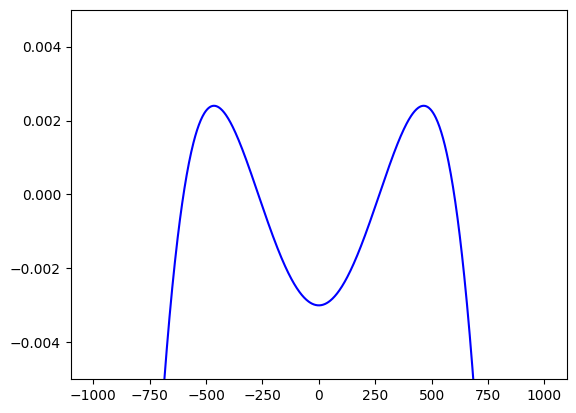

In [11]:
x1 = np.array(range(-1000,1000)) ## Pois só nos interessa a parte da equação que se verifica ao longo do comprimento da viga
dom = np.linspace(np.min(x1),np.max(x1),1000)
im = [df(t) for t in dom]

plt.plot(dom,im,'b')
plt.ylim(-0.005, 0.005)
 



Essa é o gráfico apresentado pela função, entretanto, nossa área de interesse se limita ao comprimento da viga L de 600 cm

Logo o intervalo que faremos a análise é [0,600]

Refazendo o gráfico no limite desejado:


(-0.005, 0.005)

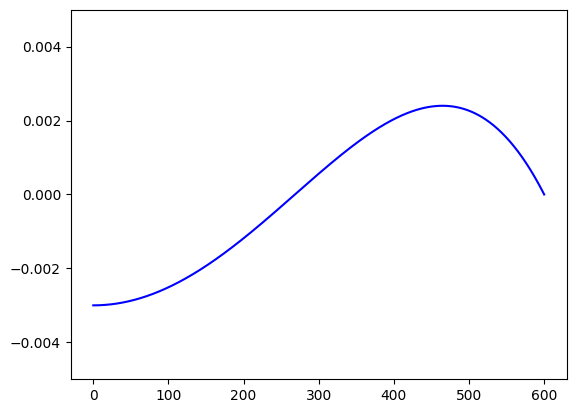

In [12]:
x = np.array(range(0,601)) ## Pois só nos interessa a parte da equação que se verifica ao longo do comprimento da viga
dom = np.linspace(np.min(x),np.max(x),1000)
im = [df(t) for t in dom]

plt.plot(dom,im,'b')
plt.ylim(-0.005, 0.005)

Segundo o gráfico da função DF existem 2 raizes ao longo do comprimento da viga L
Um deles é o prórpio extremo L=600, logo acharemos o outro

**Tempo de execução com o Metodo da BISSECAO:**




In [14]:
%%timeit

a=0
b=600
x = (a+b)/2
fa =df(a)
while abs(a-b)>2**(-30):
    
    val = df(x)

    if val*fa > 0:
        a = x
        fa = val
    else:
        b=x

    x = (a+b)/2



44.2 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


>**Output, precisao, e numero de operações com o Metodo da BISSECAO** 


In [15]:
##=========================IMPRESSÃO DE VALORES==========================

a=0
b=600
x = (a+b)/2
somas = 1
produtos = 1
comparacao = 0
fa = df(a)
somas += 2
produtos +=7


while abs(a-b)>2**(-30):
    value = df(x)
    if value*fa > 0:
        a = x
        fa = value
    else:
        b=x
    comparacao+=2 #TOTAL POR CICLO
    x = (a+b)/2
    somas+=4      #TOTAL
    produtos+=9   #TOTAL


print(f"Precisão obtida: {value}")
print(f"valor da raiz: {x}")
print(f"Número total de somas: {somas}")
print(f"Número total de produtos: {produtos}")
print(f"Número total de comparações: {comparacao}")



Precisão obtida: -6.993258440936053e-15
valor da raiz: 268.3281572998567
Número total de somas: 163
Número total de produtos: 368
Número total de comparações: 80


# Metodo de Newton

O processo de achar a raiz se deu na função **df** referente a segunda derivada, logo, para aplicarmos o método de Newton em df, precisamos da **ddf** que equivale a derivada da segunda da função inicial obtida


Funcial Inicial:
        $$ F(x) = cte\left(-x^{5}+ 7200x^{3}-129600000000x\right)$$

Derivada de F:
        $$ F'(x) = cte\left(-5x^{4}+ 2160000x^{2}-129600000000\right)$$

Derivada da segunda de F:
        $$ F''(x) = cte\left(-20x^{3}+ 4320000x\right)$$


$$ X_{n+1} = X_n - \dfrac{F'(x)}{F''(x)}$$

>Definindo ddf(x):


In [16]:
def ddf(x):
    # somas: 1
    # produtos: 5
    return cte*(-20*x*x*x + 4320000*x)

> Tomando uma aproximação de 250 e iniciando com um chute aleatório de 432, temos;

In [ ]:
%%timeit

x_ant = 432
x_aprox = 280

while abs(x_ant-x_aprox)>2**-30:
    x_ant = x_aprox
    x_aprox = x_aprox - (df(x_aprox)/ddf(x_aprox))


7.11 µs ± 488 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Agora vendo o numero de comparações, produtos e somas feitos pelo método de newton:

In [23]:
x_ant = 432
x_aprox = 250
somas = 0
produtos = 0
comparacao = 0

while abs(x_ant-x_aprox)>2**-30:
    #  1c 1s
    x_ant = x_aprox
    x_aprox = x_aprox - (df(x_aprox)/ddf(x_aprox))
    #               1s    2s7p     1p  1s5p
    somas+= 5
    produtos+= 13
    comparacao += 1


print(f"Precisão obtida: {abs(x_ant-x_aprox)}")
print(f"valor da raiz: {x_ant}")
print(f"Número total de somas: {somas}")
print(f"Número total de produtos: {produtos}")
print(f"Número total de comparações: {comparacao}")
    

Precisão obtida: 5.684341886080802e-14
valor da raiz: 268.32815729997475
Número total de somas: 20
Número total de produtos: 52
Número total de comparações: 4


# Método de Halley


$$x_{n+1} = x_n - \dfrac{2f(x_n)f'(x)}{2[f'(x_n)]^2-f(x_n)f''(x_n)} $$

Novamente, como já citado, o cálculo da raiz a ser encontrada se da pela função df(x), logo para utilizarmos a derivada da segunda, precisaremos da derivada de terceiro grau da função original f(x) logo:


$$ F'''(x) = cte(- 60 x^2 + 4320000)$$

definindo dddF(x)


In [24]:
def d3f(x):
    # 3 produtos
    # 1 soma
    return cte*(-60*x*x + 4320000)

Após montar a expressão e simplifica-lá o máximo possível retirar a variável Cte
assim, com menos operações dentre as funções temos:


In [25]:
x_ant = 432
x_a = 280

def D3F(x):
    # 2 produtos
    # 1 soma
    return -60*x*x + 4320000

def D2F(x):
    # somas: 1
    # produtos: 4
    return -20*x*x*x + 4320000*x

def DF(x):
    ## produtos: 6
    ## somas: 2
    return -5*x*x*x*x + 2160000*x*x - 129600000000


somas = 0
produtos = 0
comparacao = 0


while abs(x_ant-x_a)>2**-30:
    #   1s 1c
    x_ant = x_aprox
    x_a = x_a - ( 2*DF(x_a)*D2F(x_a) / ( (2*D2F(x_a)*D2F(x_a)) -  DF(x_a)*D3F(x_a) )  )
    #        1s   1p 2s6p 1p 1s4p   1p   1p  1s4p 1p 1s4p      1s   2s6p 1p 1s2p
    comparacao+=1
    somas +=11
    produtos+=29



print(f"Precisão obtida: {abs(x_ant-x_a)}")
print(f"valor da raiz: {x_a}")
print(f"Número total de somas: {somas}")
print(f"Número total de produtos: {produtos}")
print(f"Número total de comparações: {comparacao}")

Precisão obtida: 1.0402345651527867e-11
valor da raiz: 268.3281572999852
Número total de somas: 22
Número total de produtos: 58
Número total de comparações: 2


Obtendo a velocidade por meio do método de Halley:

In [ ]:
%%timeit

x_ant = 432
x_a = 280

while abs(x_ant-x_a)>2**-30:
    x_ant = x_aprox
    x_a = x_a - ( 2*DF(x_a)*D2F(x_a) / ( (2*D2F(x_a)*D2F(x_a)) -  DF(x_a)*D3F(x_a) )  )

5.28 µs ± 76 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Comparação entre os Métodos
Utilizando os mesmos valores de chute aproximado


### Método de Newton
>Precisão obtida: 5.684341886080802e-14
>
>valor da raiz: 268.32815729997475
>
>Número total de somas: 20
>
>Número total de produtos: 52
>
>Número total de comparações: 4
> Tudo isso em :       7.11 µs ± 488 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

### Método de Halley
>Precisão obtida: 1.0459189070388675e-11
>
>valor da raiz: 268.3281572999852
>
>Número total de somas: 22
>
>Número total de produtos: 58
>
>Número total de comparações: 2
>
>Tudo isso em :       5.28 µs ± 76 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

### Método da Bisseção
>Precisão obtida: -0.3021087646484375
>
>valor da raiz: 268.3281572998567
>
>Número total de somas: 163
>
>Número total de produtos: 368
>
>Número total de comparações: 80
>
>Tudo isso em :      30.2 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)